# HW1  Try out gradient descent
## Benjamin Cape '22 f002q3z

## Due Thursday Feb 3rd, 2022 at 11:59PM

You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w - 50 \right)$

Answer: $\frac{\partial}{\partial w}g(w) = \frac{1}{50}(4w^3 + 2w + 10)$

2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [10]:
def cost_function(w: int):
    return (1 / 50) * ((w**4) + (w**2) + (10 * w) - 50)
def cost_function_grad(w: int):
    # The derivative of the above cost function
    return (1 / 50) * ((4 * (w**3)) + (2 * w) + 10)


def gradient_descent_a(alpha: int, max_its: int, w0):
    '''
    The Gradient descent function: w^k = w^{k-1} - alpha * grad(w^{k-1})
    
    alpha: float - learning rate
    max_its: int - maximum number of iterations
    w0 - a vector that is the initialization for the weights
    '''

    # Out tracker for the weights
    w = w0
    
    # Return a generator
    yield w

    i = 0
    while i < max_its:
        # Compute the new weight using gradient descent function
        w = w - (alpha * cost_function_grad(w))

        # Yield the actual cost
        yield cost_function(w)

        i += 1

3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.0
max_its = 1000

# first run
alpha = 1
# second run
alpha = 0.1
# third run
alpha = 0.01


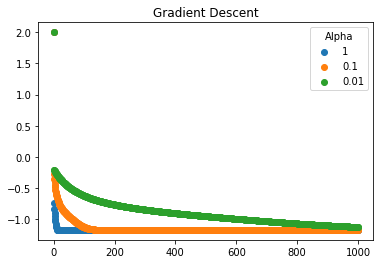

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_title("Gradient Descent")


def test(*args):
    # get a list of our output weights
    res = np.array(list(gradient_descent_a(*args)))
    # Scatter them and add a lebl
    ax.scatter(np.arange(0, len(res)), res, label=f"{args[0]}")

# Test 1
test(1, 1000, 2.0)
# Test 2
test(0.1, 1000, 2.0)
# Test 3
test(0.01, 1000, 2.0)

ax.legend(title="Alpha", loc="upper right")

plt.show()


For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

Answer: Yes - this function is convex, because if we take any two points on $g$, if they are both on the left arm (i.e. $\leq0$) then the line between them lies on $g$, same for if they are both $\geq0$. If one is $\leq0$ and the other is $\geq0$ then the line is entirely above $g$, therefore the function is convex.

5) [5 points] What is the derivative of the cost function? 

This function is not differentiable. But if we were to derive it piece-wise, the derivative would be as follows:


$\frac{\partial}{\partial w}g(w) = \begin{cases}
    \text{undefined} & w = 0 \\
    -1 & w < 0 \\
    1 & w > 0 
\end{cases}$


6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [12]:
from autograd import grad 


def gradient_descent_b(g, alpha, max_its, w0):
    '''
    The Gradient descent function w/ generic cost function: w^k = w^{k-1} - alpha * grad
    
    g: function(w0) -> int - cost function
    alpha: float - learning rate
    max_its: int - maximum number of iterations
    w0 - a vector that is the initialization for the weights
    '''

    # Find the gradient of the function
    gradient = grad(g)

    # Track out weights
    w = w0

    # Return arrays
    cost_history = [g(w)]
    weight_history = [w]

    i = 0
    while i < max_its:

        # calculate the new eights using gradient descent
        w = w - (alpha * gradient(w))

        # Add to our output arrays
        cost_history.append(g(w))
        weight_history.append(w)

        i += 1

    return weight_history, cost_history


7) [10 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

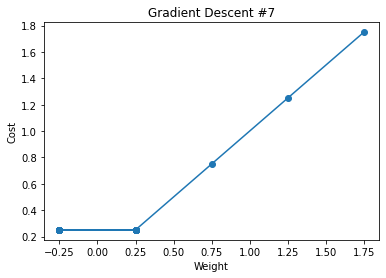

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title("Gradient Descent #7")

def abs_cost(w):
    return abs(w)

# Plot weight against cost
ax.set_ylabel('Cost')
ax.set_xlabel('Weight')

def plot(weight_history, cost_history):
    # Scatter them
    ax.scatter(weight_history, cost_history)
    # And connect them
    ax.plot(weight_history, cost_history)
    
# Plot for above inputs
plot(*gradient_descent_b(abs_cost, 0.5, 20, 1.75))

plt.show()

8) [15 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

In [29]:
from autograd import grad 

DIMINISHING_ALPHA = "diminishing"

def gradient_descent_c(g, a, max_its, w0):
    '''
    The Gradient descent function w/ generic cost function: w^k = w^{k-1} - alpha * grad
    
    g: function(w0) -> int - cost function
    alpha: float - learning rate
    max_its: int - maximum number of iterations
    w0 - a vector that is the initialization for the weights
    '''

    # Find the gradient of the function
    gradient = grad(g)

    # Track out weights
    w = w0

    # Return arrays
    cost_history = [g(w)]
    weight_history = [w]

    i = 0
    while i < max_its:

        # ternary operator to toggle diminishing alpha
        alpha = 1 / (i + 1) if a == DIMINISHING_ALPHA else a

        # gradient descent function
        w = w - (alpha * gradient(w))

        # store data in output arrays
        cost_history.append(g(w))
        weight_history.append(w)

        i += 1

    return weight_history, cost_history

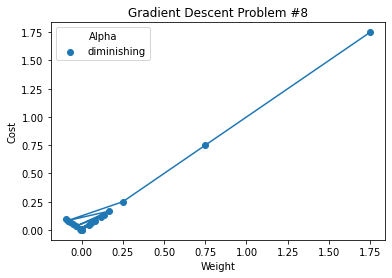

In [30]:
fig, ax = plt.subplots()

ax.set_title("Gradient Descent Problem #8")

def plot(*args):
    alpha = args[1]
    weights, costs = gradient_descent_c(*args)
    ax.scatter(weights, costs, label=f'{alpha}')
    ax.plot(weights, costs)

ax.set_ylabel('Cost')
ax.set_xlabel('Weight')

plot(abs_cost, DIMINISHING_ALPHA, 20, 1.75)

ax.legend(title='Alpha', loc='upper left')

plt.show()

9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why ?

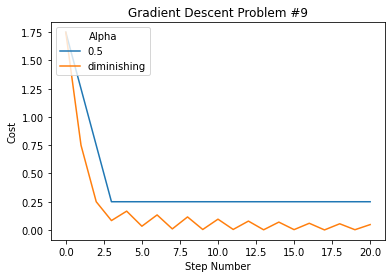

In [33]:
fig, ax = plt.subplots()

ax.set_title("Gradient Descent Problem #9")

def plot(*args):
    alpha = args[1]
    _, costs = gradient_descent_c(*args)
    # ax.scatter(costs, label=f'{alpha}')
    ax.plot(costs, label=f"{alpha}")

ax.set_ylabel('Cost')
ax.set_xlabel('Step Number')

plot(abs_cost, 0.5, 20, 1.75)
plot(abs_cost, DIMINISHING_ALPHA, 20, 1.75)

ax.legend(title='Alpha', loc='upper left')

plt.show()


Answer: It would appear that the diminishing alpha performs better, as it reaches a lower cost, even though it fluctuates when it gets there, while the 0.5 alpha does gets stuck at some local min.

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [34]:
DIMINISHING_ALPHA = "diminishing"

def gradient_descent_d(g, a, max_its, w0):
    '''
    The Gradient descent function w/ generic cost function: w^k = w^{k-1} - alpha * grad
    
    g: function(w0) -> int - cost function
    alpha: float - learning rate
    max_its: int - maximum number of iterations
    w0 - a vector that is the initialization for the weights
    '''

    gradient = []
    for i in range(0, len(w0)):
        # initialize gradient functions for each dimension
        gradient.append(grad(g, i))
        
    # track out weights
    w = w0

    # Return arrays
    cost_history = [g(*w)]
    weight_history = [w]

    i = 0
    while i < max_its:

        # Possibly diminishing alpha
        alpha = 1 / (i + 1) if a == DIMINISHING_ALPHA else a

        # This corresponds to alpha * gradient(w) term, but now we must calculate it for each parameter to the cost function, 
        # i.e. we must calculate the gradient in each direction.
        sub = np.array([(alpha * gradient[i](*w)) for i in range(len(w))])
        
        # Perform gradient descent subtraction
        w = np.subtract(w, sub)

        # Add our data to our output arrays
        cost_history.append(g(*w))
        weight_history.append(w)

        i += 1

    return weight_history, cost_history

11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



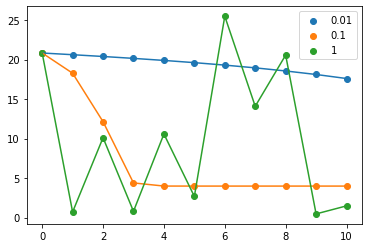

In [35]:
import autograd.numpy as np

fig, ax = plt.subplots()

def plot_2(*args):
    alpha = args[1]
    costs = gradient_descent_d(*args)[1]
    ax.scatter(np.arange(0, len(costs)), costs, label=f'{alpha}')
    ax.plot(np.arange(0, len(costs)), costs)

def cost_function_10(w0, w1):
    return (w0**2) + (w1**2) + (2 * np.sin(1.5 * (w0 + w1)) + 2)

w = np.array([3.0,3.0])
plot_2(cost_function_10, 0.01, 10, w)
plot_2(cost_function_10, 0.1, 10, w)
plot_2(cost_function_10, 1, 10, w)

ax.legend(loc="upper right")

plt.show()

Answer: Clearly the alpha=1 leads to the oscillating behavior. This makes perfect sense, as we overextend our learning each time, and this overcompensate for an differential changes.

12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$ 

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (using your intuition). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

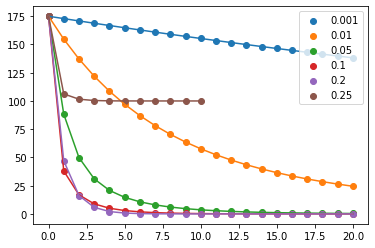

In [18]:
import autograd.numpy as np

fig, ax = plt.subplots()

def cost_function_12(w0, w1, w2):
    return (2 * (w0**2)) + (w1**2) + (4 * (w2**2))

w = np.array([5.0, 5.0, 5.0])
plot_2(cost_function_12, 0.001, 20, w)
plot_2(cost_function_12, 0.01, 20, w)
plot_2(cost_function_12, 0.05, 20, w)
plot_2(cost_function_12, 0.1, 20, w)
plot_2(cost_function_12, 0.2, 20, w)
plot_2(cost_function_12, 0.25, 10, w)

ax.legend(loc='upper right')

plt.show()

Answer: It appears that the $\alpha=0.2$ converges the fastest, and if we go any higher, i.e. $\alpha=0.25$ we completely miss our minimum at around 0 and converge to a local minimum around $100$.